In [25]:
import pandas as pd
data = pd.read_csv('/Users/user/Desktop/INSY695/group project/marketing_campaign.csv',sep='\t')

In [13]:
from pathlib import Path
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "../plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [26]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [27]:
# Descriptive statistics of the dataset
descriptive_stats = data.describe()

# Checking for missing values
missing_values = data.isnull().sum()

descriptive_stats, missing_values[missing_values > 0]

(                 ID   Year_Birth         Income      Kidhome     Teenhome  \
 count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
 mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
 std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
 min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
 25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
 50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
 75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
 max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
 
            Recency     MntWines    MntFruits  MntMeatProducts  \
 count  2240.000000  2240.000000  2240.000000      2240.000000   
 mean     49.109375   303.935714    26.302232       166.950000   
 std      28.962453   336.597393    39.773434       225.715373   
 min       0.000000     0.000000

In [28]:
missing_values = data.isnull().sum() # Only column income that has 24 missing values
missing_p = round(24/data.shape[0] * 100, 4) # Hard code in 24
print("Missing Values:", missing_values)
print("Missing Value %:", missing_p, "%")

Missing Values: ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Missing Value %: 1.0714 %


In [35]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

# separate numerical and categorical values
columns_for_imputation = ['Year_Birth', 'Kidhome', 'Teenhome', 'Income']
data_for_imputation = data[columns_for_imputation].copy()

data_categorical = data[['Education', 'Marital_Status']]

encoder = OneHotEncoder(drop='first')
data_encoded = encoder.fit_transform(data_categorical) 

data_encoded = pd.DataFrame(data_encoded.toarray(), 
                            columns=encoder.get_feature_names_out(['Education', 'Marital_Status']))

# combining back the numerical and categorical values
data_for_imputation = data_for_imputation.reset_index(drop=True)
data_encoded = data_encoded.reset_index(drop=True)

data_combined = pd.concat([data_for_imputation, data_encoded], axis=1)

# impute the missing values
imputer = IterativeImputer()
imputed_data = pd.DataFrame(imputer.fit_transform(data_combined), columns=data_combined.columns)

# use a copy for the new data
data2 = data.copy()
data2.reset_index(drop=True, inplace=True)
imputed_data.reset_index(drop=True, inplace=True)
data2.loc[data2['Income'].isnull(), 'Income'] = imputed_data.loc[data2['Income'].isnull(), 'Income']

In [36]:
# Checking whether got rid of missing values
print("Number of missing values for each column:")
print(data2.isnull().sum())

# Checking whether deleted more values than needed
different_rows_data = len(data) - len(pd.merge(data, data2, how='inner'))
different_rows_data2 = len(data2) - len(pd.merge(data, data2, how='inner'))

print("Number of different rows in data compared to data2:", different_rows_data)
print("Number of different rows in data2 compared to data:", different_rows_data2)

Number of missing values for each column:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64
Number of different rows in data compared to data2: 0
Number of different rows in data2 compared to data: 0


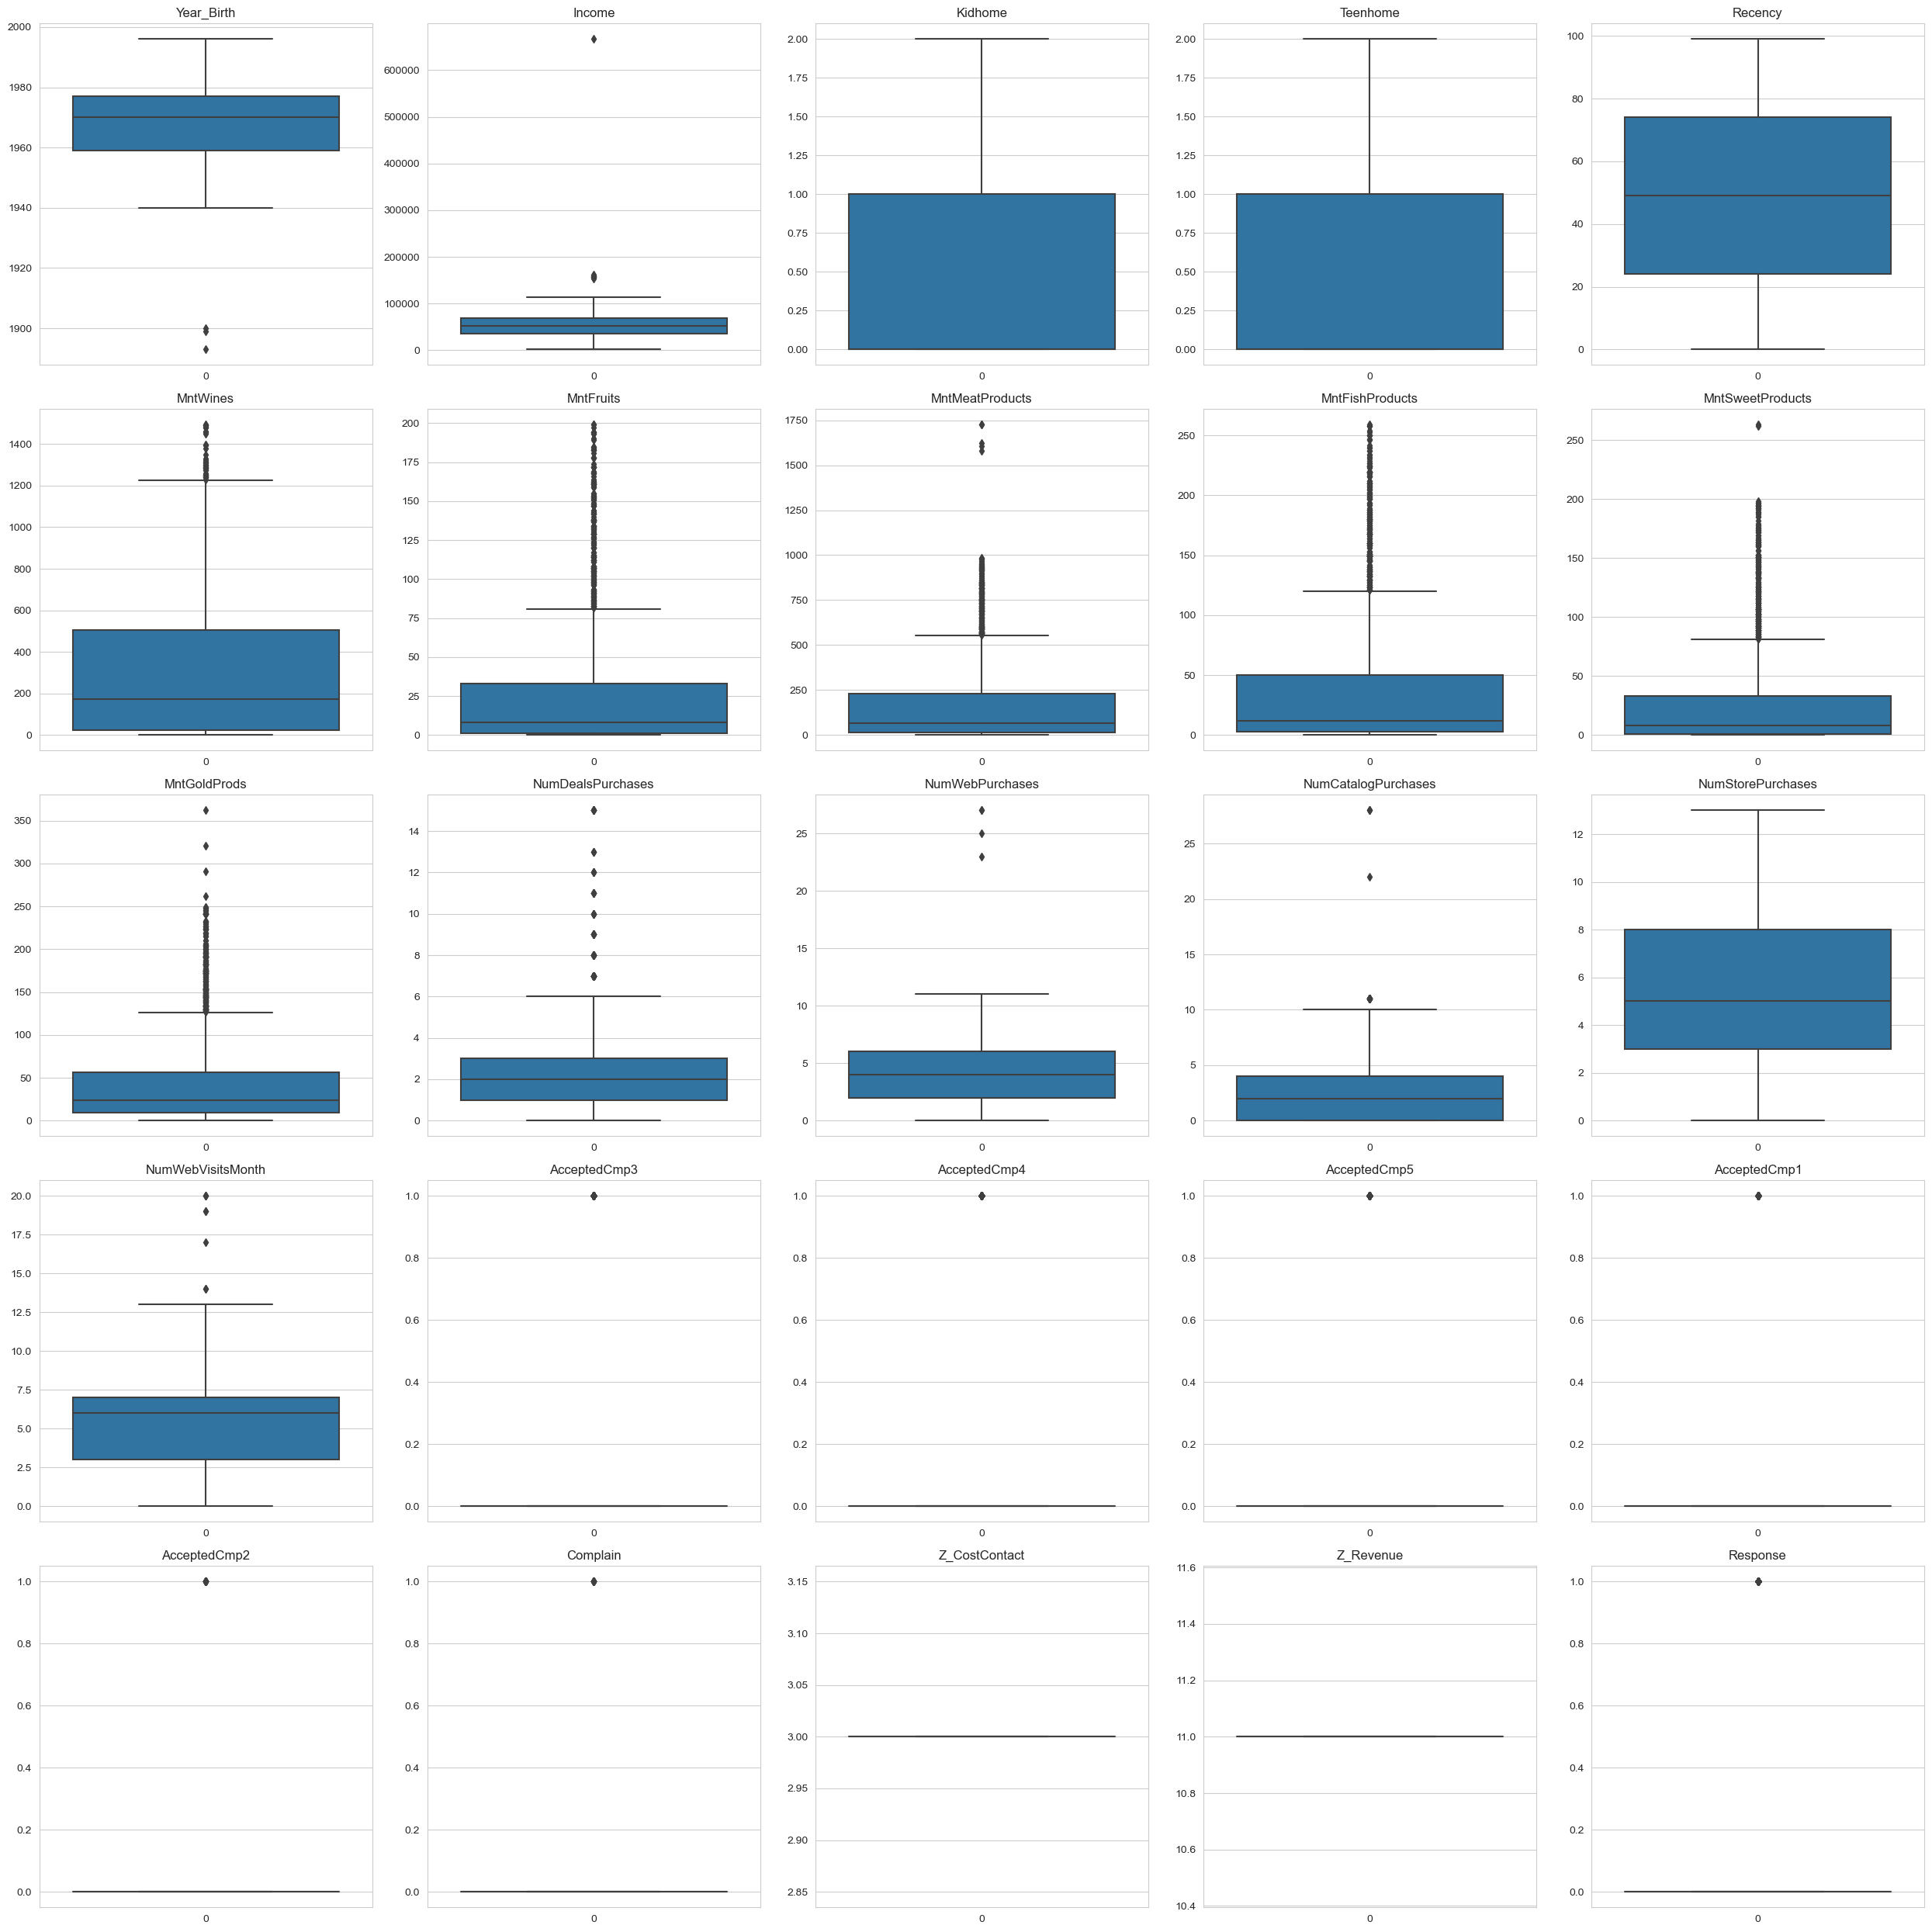

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numerical_columns = data.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

num_cols = len(numerical_columns.columns)
num_rows = (num_cols + 4) // 5

plt.figure(figsize=(25, 5 * num_rows))
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(num_rows, 5, i+1)
    sns.boxplot(data=numerical_columns[column])
    plt.title(column)
plt.tight_layout()
plt.show()


Remove Customer with age over 100

In [37]:
data2 = data2[~data2['Year_Birth'].isin([1893, 1899, 1900])]

Drop extreme high income outlier

In [38]:
data2 = data2[(data2["Income"] < 160000)] 

Collinearity check

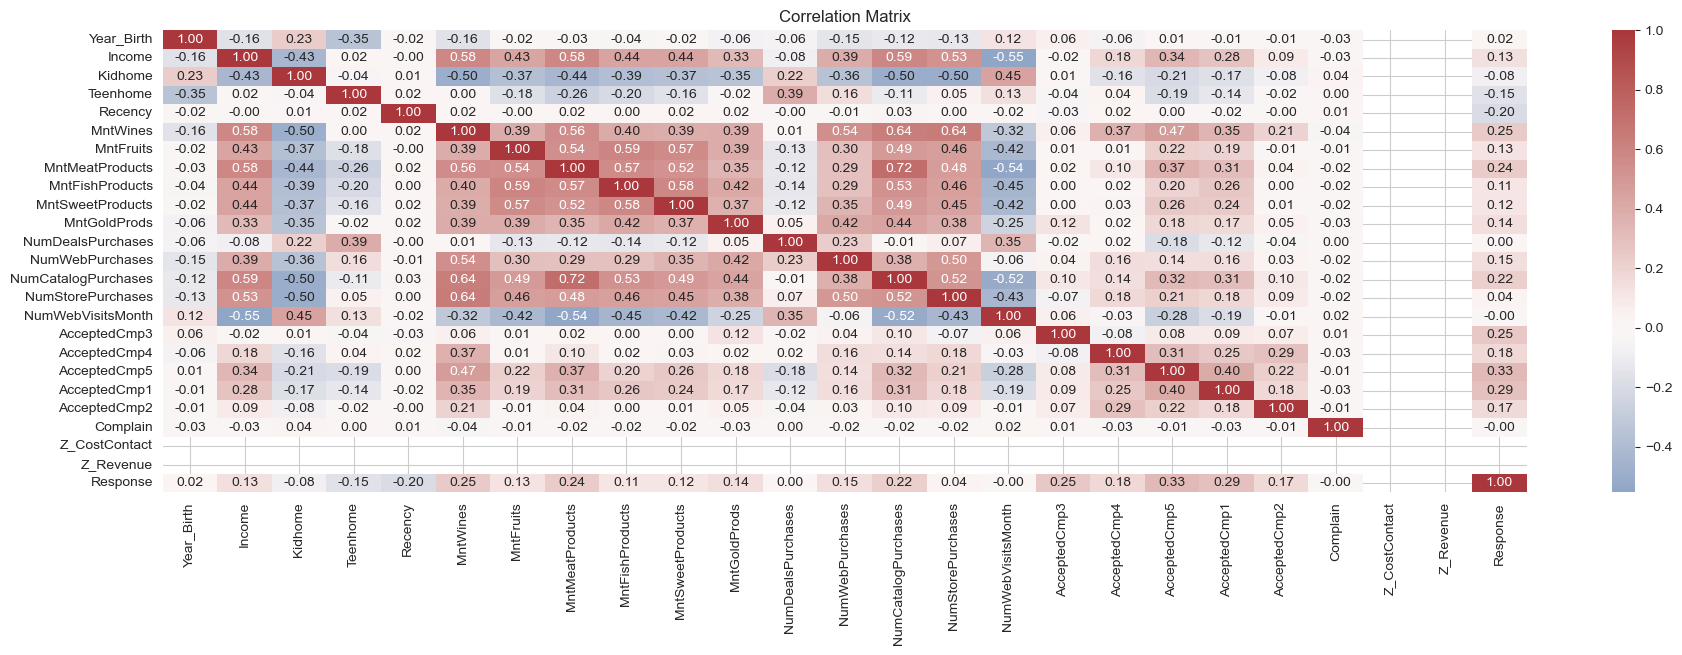

No high correlation.


In [39]:
#Correlation matrix
corr_matrix = numerical_columns.corr()
plt.figure(figsize=(22, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation Matrix')
plt.show()

# Setting a threshold of 80% as high correlation
high_correlation = corr_matrix[((corr_matrix <= -0.8) & (corr_matrix != -1)) | ((corr_matrix >= 0.8) & (corr_matrix != 1))]
if high_correlation.isnull().all().all():
    print("No high correlation.")
else:
    print("Correlation Matrix for values <= -0.8 or >= 0.8 (excluding self-compare):")
    print(high_correlation)

VIF

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

numerical_columns1 = data2.select_dtypes(include=['int64', 'float64']).drop(columns=['ID'])

VIF_features = add_constant(numerical_columns1)

VIF = pd.Series([variance_inflation_factor(VIF_features.values, i) for i in range(VIF_features.shape[1])], index=VIF_features.columns)
print(VIF) # Usually VIF >= 5 suggest multicollinearity, but we dont have any.

Year_Birth             1.257287
Income                 4.547606
Kidhome                1.901694
Teenhome               1.717122
Recency                1.062525
MntWines               3.525086
MntFruits              1.954523
MntMeatProducts        3.164579
MntFishProducts        2.131239
MntSweetProducts       1.933012
MntGoldProds           1.510384
NumDealsPurchases      1.704679
NumWebPurchases        2.052171
NumCatalogPurchases    3.136594
NumStorePurchases      2.489553
NumWebVisitsMonth      2.651874
AcceptedCmp3           1.160230
AcceptedCmp4           1.383889
AcceptedCmp5           1.675311
AcceptedCmp1           1.363816
AcceptedCmp2           1.161037
Complain               1.005023
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               1.405233
dtype: float64


/Users/user/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


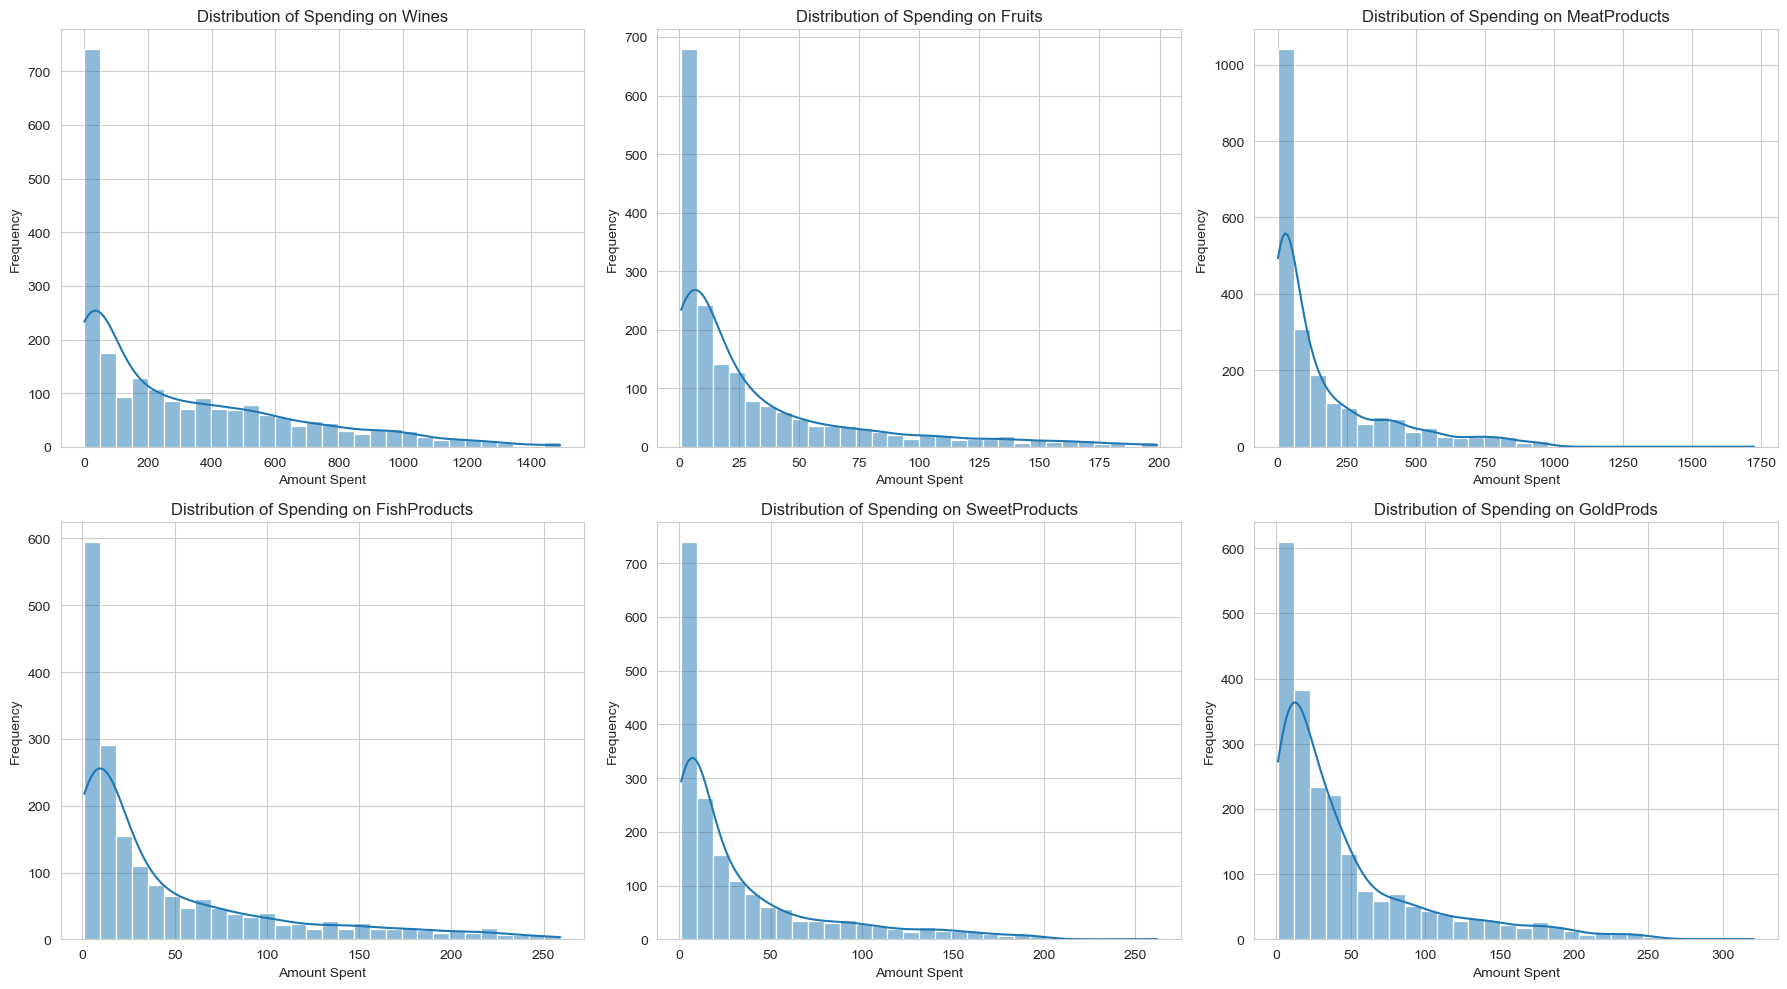

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plots
sns.set_style("whitegrid")

# Data for spending distribution across different product categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting the distribution of spending across different product categories
plt.figure(figsize=(18, 10))
for i, category in enumerate(spending_categories, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[data[category] > 0][category], bins=30, kde=True)
    plt.title(f'Distribution of Spending on {category[3:]}')
    plt.xlabel('Amount Spent')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
#Wines appear to be the most popular product category among customers, with a broad range of spending, 
#indicating that a significant portion of the customer base may be interested in wine products.
#Other categories like fruits, meat, fish, sweets, and gold have their specific customer segments, with most 
#spending in lower ranges but with some high spenders, indicating potential for targeted marketing strategies.

In [11]:
from mlxtend.frequent_patterns import apriori, association_rules
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Define a threshold for binarization, e.g., using the 75th percentile
thresholds = data[spending_columns].quantile(0.75)

# Binarize the spending: 1 if the spending is above the threshold, 0 otherwise
binarized_spending = (data[spending_columns] > thresholds).astype(int)

# Applying the Apriori algorithm to get frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(binarized_spending, min_support=0.1, use_colnames=True)

# Generating the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sorting the rules by confidence and displaying the top 10 rules
top_rules = rules.sort_values('confidence', ascending=False).head(10)

print(top_rules)

                            antecedents         consequents  \
44         (MntFishProducts, MntFruits)  (MntSweetProducts)   
43        (MntSweetProducts, MntFruits)   (MntFishProducts)   
48  (MntSweetProducts, MntMeatProducts)   (MntFishProducts)   
38         (MntMeatProducts, MntFruits)  (MntSweetProducts)   
50   (MntMeatProducts, MntFishProducts)  (MntSweetProducts)   
31         (MntMeatProducts, MntFruits)   (MntFishProducts)   
42  (MntSweetProducts, MntFishProducts)         (MntFruits)   
25                    (MntFishProducts)  (MntSweetProducts)   
24                   (MntSweetProducts)   (MntFishProducts)   
36  (MntSweetProducts, MntMeatProducts)         (MntFruits)   

    antecedent support  consequent support   support  confidence      lift  \
44            0.165079            0.246712  0.126984    0.769231  3.117930   
43            0.167800            0.246712  0.126984    0.756757  3.067369   
48            0.164626            0.246712  0.123356    0.749311  3.0371

/Users/user/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#The rules with MntFishProducts, MntFruits, and MntSweetProducts are particularly strong, as indicated by their 
#high confidence and lift values. This suggests that customers who buy fish products and fruits are likely to also
#buy sweet products.
#Similarly, MntMeatProducts is frequently bought together with both MntFruits and MntFishProducts, 
#which again are often bought with MntSweetProducts.
#These rules have lift values significantly greater than 1 (ranging from about 2.87 to 3.12), indicating that 
#the products in these rules are more likely to be bought together than would be expected if they were statistically independent.

/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_88834/3137388524.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_88834/3137388524.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_88834/3137388524.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_88834/3137388524.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_88834/3137388524.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/6t/hm7b1zyn7klgzfp2k59y6xgh0000gn/T/ipykernel_88834/3137388524.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


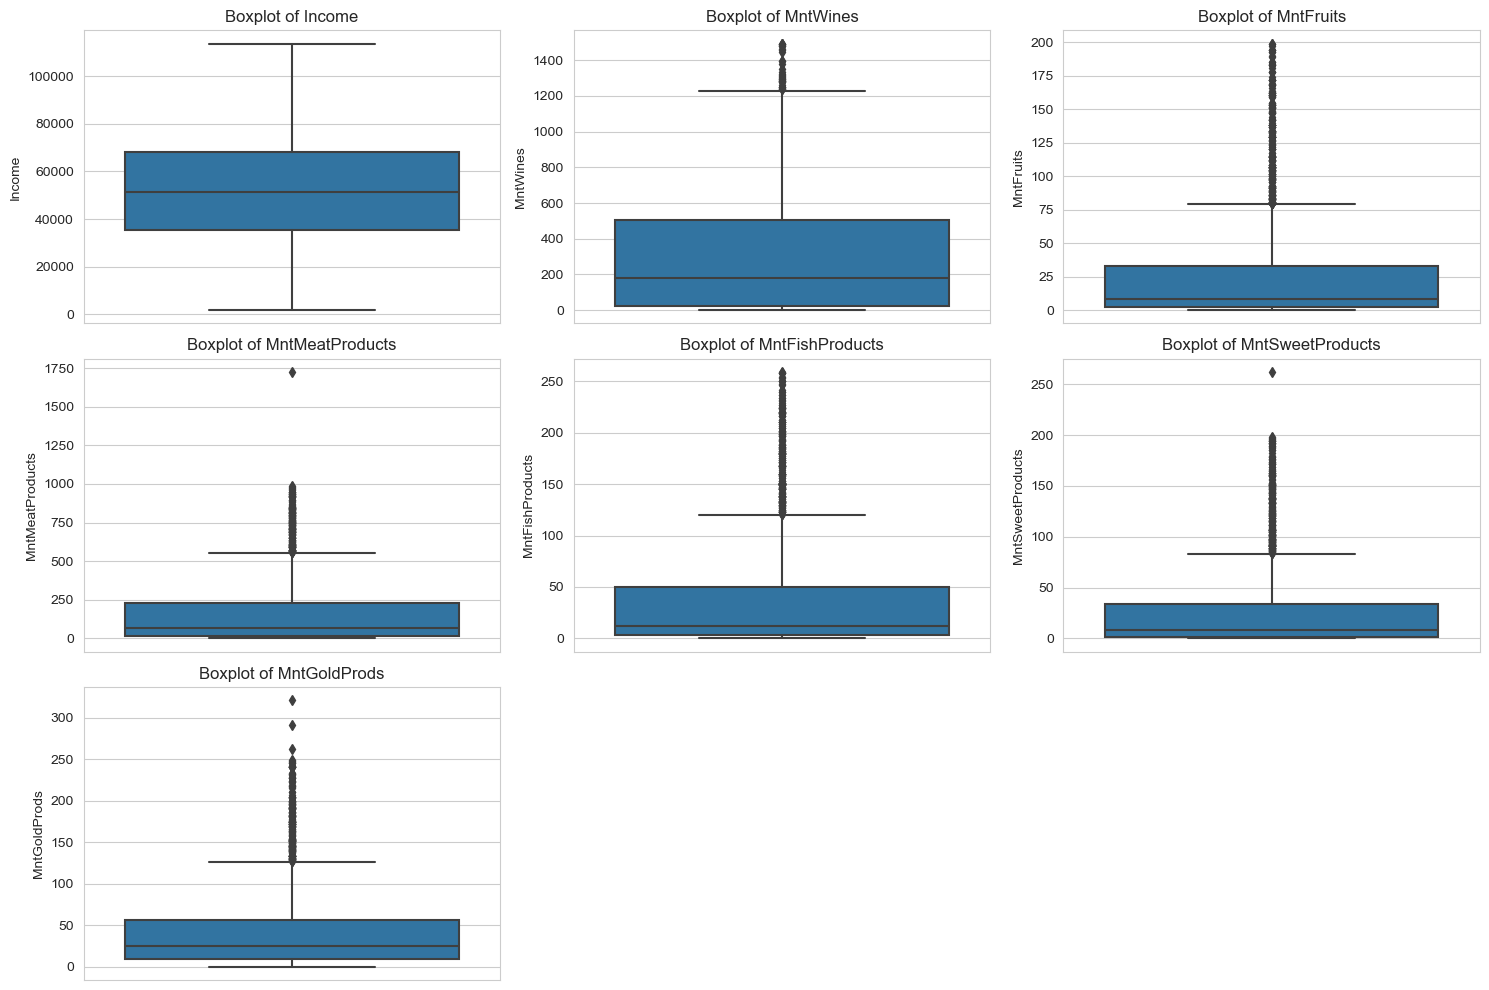

In [14]:
import seaborn as sns
# choose income and amounts spent on different products as they're likely to show interesting distributions
key_variables = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Plotting boxplots for the selected variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot of {var}')
    plt.tight_layout()

plt.show()


In [ ]:
#Right-Skewed Distributions across most product categories suggest that most customers are moderate spenders, 
#with a smaller segment that spends significantly more.
#Income Distribution suggests that while the dataset has a range of incomes, there are particularly affluent 
#individuals who might drive different purchasing behaviors.

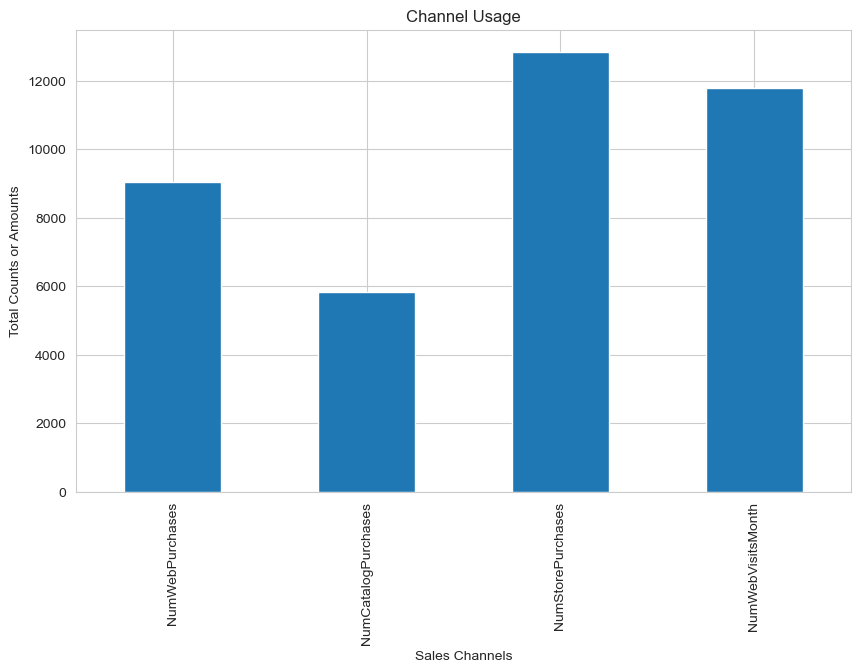

In [12]:
channel_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Analyzing channel usage
channel_usage = data[channel_columns].sum()

# Plotting the channel usage
channel_usage.plot(kind='bar', figsize=(10, 6))
plt.title('Channel Usage')
plt.xlabel('Sales Channels')
plt.ylabel('Total Counts or Amounts')
plt.show()

In [ ]:
#It looks like purchases made in physical stores (NumStorePurchases) and visits to the website (NumWebVisitsMonth)
#are the most frequent activities, while purchases made through catalogs (NumCatalogPurchases) are the least common
#among the customers.

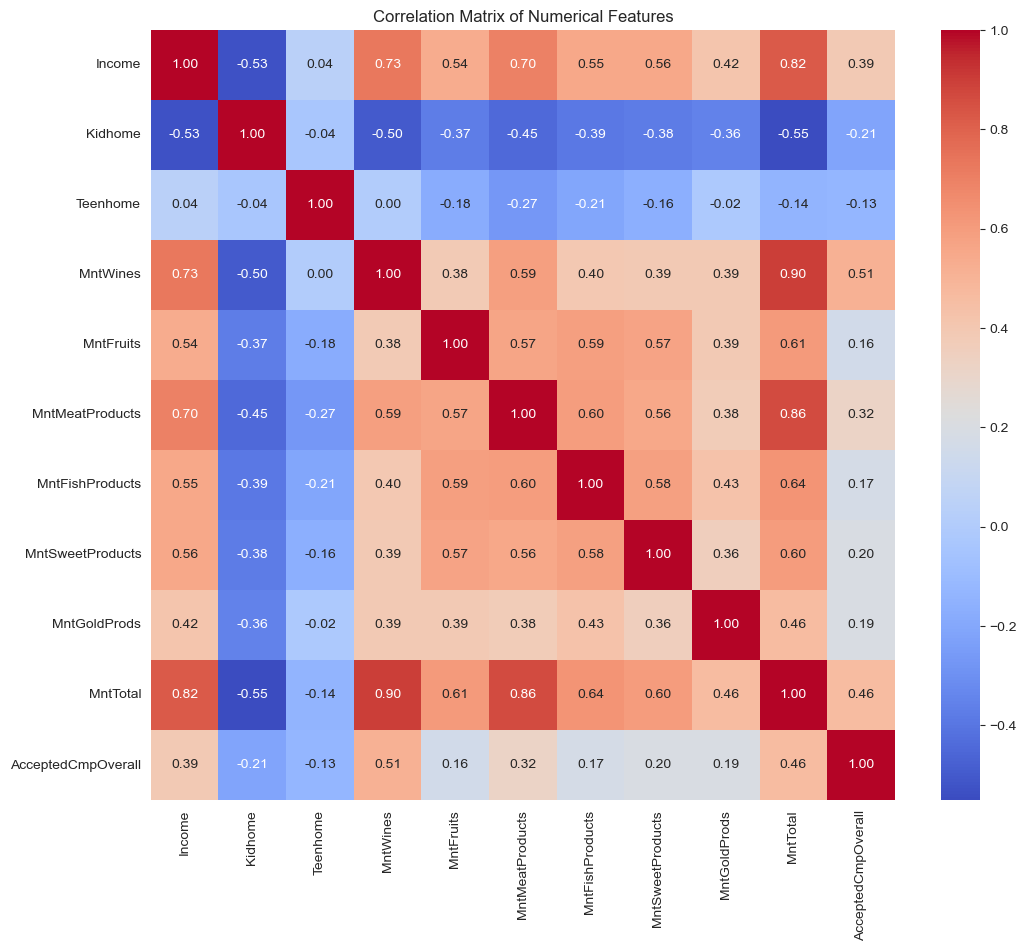

(   education_Graduation  education_Master  education_PhD  education_2n Cycle  \
 0                     0                 0              0                   0   
 1                     0                 0              0                   1   
 2                     0                 0              1                   0   
 3                     0                 1              0                   0   
 4                     1                 0              0                   0   
 
    education_Basic  AvgSpending  
 0                1    58.962963  
 1                0   452.272727  
 2                0   640.466387  
 3                0   571.002747  
 4                0   570.938904  ,
    marital_Single  marital_Together  marital_Married  marital_Divorced  \
 0               0                 0                0                 0   
 1               0                 0                0                 1   
 2               0                 0                1                 0   
 

In [5]:
# Calculating average spending based on education level and marital status
avg_spending_by_education = data.groupby(['education_Graduation', 'education_Master', 'education_PhD', 'education_2n Cycle', 'education_Basic'])['MntTotal'].mean().reset_index(name='AvgSpending')
avg_spending_by_marital = data.groupby(['marital_Single', 'marital_Together', 'marital_Married', 'marital_Divorced', 'marital_Widow'])['MntTotal'].mean().reset_index(name='AvgSpending')

# Calculating average spending based on the presence of kids/teens at home
avg_spending_by_kidteen = data.groupby(['Kidhome', 'Teenhome'])['MntTotal'].mean().reset_index(name='AvgSpending')

# Preparing data for correlation analysis
correlation_data = data[['Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal', 'AcceptedCmpOverall']]
correlation_matrix = correlation_data.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

avg_spending_by_education, avg_spending_by_marital, avg_spending_by_kidteen

In [ ]:
#Education level and marital status significantly influence spending habits, with higher education levels and 
#certain marital statuses (e.g., Widowed) associated with higher spending.
#The presence of children or teenagers in the household generally reduces spending on products, 
#indicating a potential shift in priorities or available disposable income.
#Income and response to marketing campaigns are key drivers of spending, highlighting the importance of 
#targeting marketing efforts towards higher-income segments and those more receptive to campaigns.

In [6]:
# Defining the quartiles for Recency, Monetary Value, and Engagement
quantiles = data[['Recency', 'MntTotal', 'AcceptedCmpOverall']].quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

# Function to classify customers based on quartiles
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def MScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Assigning scores based on the defined quartiles
data['R'] = data['Recency'].apply(RScore, args=('Recency', quantiles,))
data['M'] = data['MntTotal'].apply(MScore, args=('MntTotal', quantiles,))
data['F'] = data['AcceptedCmpOverall'].apply(MScore, args=('AcceptedCmpOverall', quantiles,))

# Creating RFM Segment and RFM Score
data['RFM_Segment'] = data['R'].map(str) + data['F'].map(str) + data['M'].map(str)
data['RFM_Score'] = data[['R', 'F', 'M']].sum(axis=1)

# Analyzing RFM Segments
rfm_score_analysis = data.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'MntTotal': ['mean', 'count'],
    'AcceptedCmpOverall': 'mean'
}).reset_index()

rfm_score_analysis.columns = ['RFM_Score', 'Average_Recency', 'Average_MntTotal', 'Customer_Count', 'Average_AcceptedCmpOverall']

rfm_score_analysis


,RFM_Score,Average_Recency,Average_MntTotal,Customer_Count,Average_AcceptedCmpOverall
0,3,11.803279,1513.327869,61,1.655738
1,4,27.505155,1293.381443,97,1.556701
2,5,50.655914,1186.677419,93,1.537634
3,6,45.092308,1070.230769,195,0.907692
4,7,32.761702,776.442553,235,0.259574
5,8,35.427350,585.270655,351,0.054131
6,9,45.926941,458.657534,438,0.018265
7,10,59.245902,242.248634,366,0.000000
8,11,75.630901,94.562232,233,0.000000
9,12,85.419118,33.727941,136,0.000000


In [ ]:
#High-Value Customers (Low RFM Score): Focus on retaining these customers through personalized offers and 
#loyalty programs, as they show high engagement and spending.
#Opportunity for Growth (Medium RFM Score): Implement targeted marketing campaigns to increase the frequency 
#of purchases, upgrade their products, or improve engagement through personalized content.
#Re-engage or Review Strategy (High RFM Score): For customers with high RFM scores, consider re-engagement 
#campaigns or analyze their customer journey for potential improvements in service or product offerings.

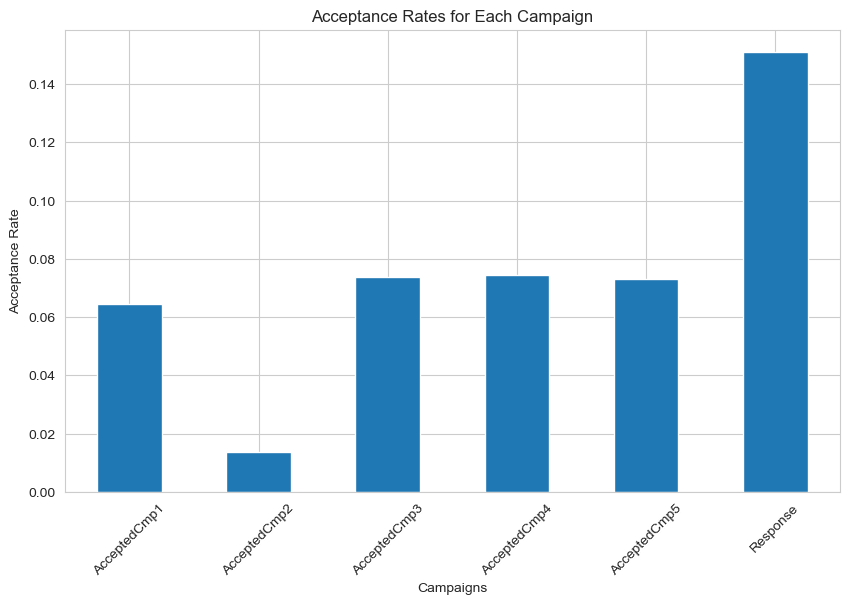

(AcceptedCmp1    0.064399
 AcceptedCmp2    0.013605
 AcceptedCmp3    0.073923
 AcceptedCmp4    0.074376
 AcceptedCmp5    0.073016
 Response        0.151020
 dtype: float64,
    Response        Income  education_Graduation  education_Master  \
 0         0  50094.496261              0.513355          0.164530   
 1         1  60209.675676              0.456456          0.168168   
 
    education_PhD  education_2n Cycle  education_Basic  
 0       0.200321            0.094017         0.027778  
 1       0.303303            0.066066         0.006006  )

In [7]:
# Calculate the acceptance rate for each campaign and the last campaign (target variable).
campaign_acceptance_rates = data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()

# Cross-analysis with demographics - we'll look at income and education as examples.
# For this, we'll create a new dataframe that includes the average income and education level for customers who accepted each campaign.
campaign_income_education = data.groupby('Response').agg({
    'Income': 'mean',
    'education_Graduation': 'mean',
    'education_Master': 'mean',
    'education_PhD': 'mean',
    'education_2n Cycle': 'mean',
    'education_Basic': 'mean'
}).reset_index()

# Visualizing the acceptance rates for each campaign
plt.figure(figsize=(10, 6))
campaign_acceptance_rates.plot(kind='bar')
plt.title('Acceptance Rates for Each Campaign')
plt.xlabel('Campaigns')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

campaign_acceptance_rates, campaign_income_education


In [ ]:
#The acceptance rate for the last campaign (Response) is notably higher than the rates for the individual campaigns,
#which may indicate either an improved campaign strategy over time or a cumulative effect of the earlier campaigns.
#Income:
#Customers who did not respond to the last campaign (Response = 0) have an average income of $50,094.
#Customers who responded to the last campaign (Response = 1) have a higher average income of $60,210.
#Education Level:
#The proportion of customers with a Graduation level of education is slightly higher among those who did not 
#respond (Response = 0) compared to those who did (Response = 1).
#Customers with a PhD are more likely to have responded to the last campaign (Response = 1).
#Lower education levels, like 2n Cycle and especially Basic, have a smaller representation among those who responded to the last campaign.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Assessing the relationship between campaign acceptances and spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Calculate the average spend in different categories for customers who accepted each campaign
campaign_spending = data.groupby(campaign_columns)[spending_columns].mean().reset_index()

# Predictive Analysis for the Last Campaign (Response)
# Preparing the dataset for logistic regression
X = data.drop(['Response', 'RFM_Segment', 'RFM_Score', 'R', 'F', 'M'], axis=1)  # Dropping non-predictive and target columns
y = data['Response']  # Target variable

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting the test set results and calculating the classification report
y_pred = logreg.predict(X_test)
report = classification_report(y_test, y_pred)

# Identifying the most predictive factors for campaign response
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

campaign_spending, report, feature_importance.head(10)


(    AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
 0              0             0             0             0             0   
 1              0             0             0             0             0   
 2              0             0             0             0             1   
 3              0             0             0             0             1   
 4              0             0             0             1             0   
 5              0             0             0             1             0   
 6              0             0             0             1             1   
 7              0             0             0             1             1   
 8              0             0             1             0             0   
 9              0             0             1             0             0   
 10             0             0             1             0             1   
 11             0             0             1             0             1   

In [ ]:
#Customers who accepted multiple campaigns tended to spend more across most product categories than those who 
#did not accept any or accepted fewer campaigns.
#There is a noticeable increase in spending on wines, meat, and gold products among those who accepted more 
#campaigns, which may indicate that these campaigns were successful in targeting customers with a higher 
#spending propensity in these categories.

#The top factors that were most indicative of a customer's response to the last campaign, 
#based on the importance weights from the logistic regression, include:
#Customer_Days: This suggests the length of the customer relationship is significant.
#MntMeatProducts: High spending on meat products seems to be a strong predictor.
#AcceptedCmpOverall: The overall number of accepted campaigns correlates with accepting the last campaign.
#NumCatalogPurchases: Frequency of purchases made through catalogs is relevant.
#NumWebVisitsMonth: The number of visits to the company's web site is also indicative.
#AcceptedCmp3: Acceptance of the third campaign in particular seems to be a strong predictor.
#NumDealsPurchases: The number of purchases made with a deal is significant.
#education_PhD: Having a PhD appears to influence campaign response positively.
#marital_Single: Being single is also among the top predictors.
#AcceptedCmp5: Acceptance of the fifth campaign is a relevant factor.

In [ ]:
#Long-term customers who have been with the company for longer periods are more likely to respond positively to campaigns.
#There is a segment of customers who are more responsive to campaigns and tend to spend more, 
#particularly on certain categories like meats and wines.
#Personalization based on the customer's previous acceptance of campaigns and their purchasing habits 
#in specific categories could enhance the effectiveness of future campaigns.
#Educational background and marital status may also be used to tailor campaigns, as they seem to influence response rates.